<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/NN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
#from tensorflow import keras
print(tf.__version__)

2.2.0


In [0]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255

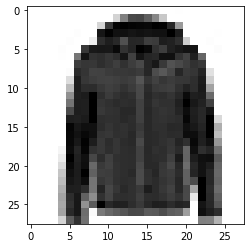

In [14]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [15]:
import numpy as np
print(np.unique(labels))
print(images.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [0]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
red1 (Dense)                 (None, 200)               157000    
_________________________________________________________________
hred2 (Dense)                (None, 50)                10050     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


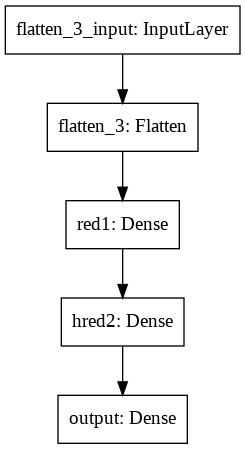

In [17]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary()
tf.keras.utils.plot_model(model)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 200)               157000    
_________________________________________________________________
h2 (Dense)                   (None, 50)                10050     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


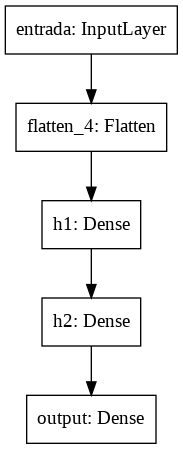

In [18]:
#arquitectura funcional
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
model_fun = tf.keras.Model(inputs=input_l,outputs=output)
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


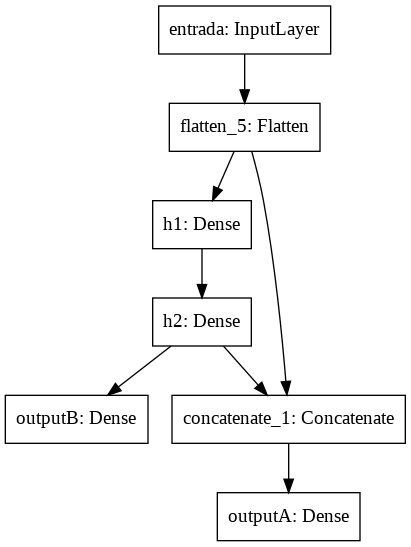

In [19]:
#arquitectura funcional 2 
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
concat = tf.keras.layers.concatenate([h2,flatten])
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [0]:
model.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy


In [21]:
history = model.fit(Xtrain, ytrain , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_data=(Xtest, ytest))

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4934 - accuracy: 0.8232 - val_loss: 0.4168 - val_accuracy: 0.8515
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8677 - val_loss: 0.3793 - val_accuracy: 0.8639
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3254 - accuracy: 0.8796 - val_loss: 0.3633 - val_accuracy: 0.8655
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3013 - accuracy: 0.8878 - val_loss: 0.3487 - val_accuracy: 0.8750
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2853 - accuracy: 0.8933 - val_loss: 0.3395 - val_accuracy: 0.8765
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2730 - accuracy: 0.8985 - val_loss: 0.3405 - val_accuracy: 0.8798
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2581 - accuracy: 0.9043 - val_loss: 0.3325 - val_accuracy: 0.8801
Epoch 

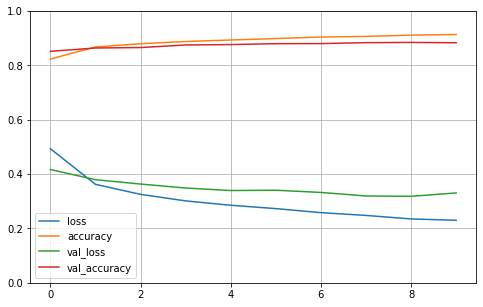

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [0]:
yest = model.predict(Xtest)

In [24]:
yest[0].argmax()

9

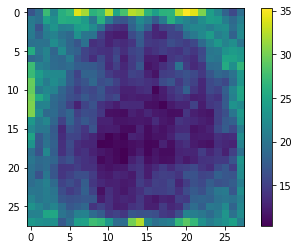

In [25]:
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [26]:
model.layers[1].get_weights()[1].shape

(200,)